In [ ]:
# import the 4D data
import numpy as np
from mpes_tools.hdf5 import load_h5

data_array= load_h5('//nap33/wahada/Scan130_scan130_Amine_100x100x300x50.h5')

In [ ]:
# Use the 4D Gui
from mpes_tools.show_4d_window import show_4d_window
%gui qt
graph_4d = show_4d_window(data_array)
graph_4d.show()

results extracted!


In [4]:
5

5

In [ ]:
data='your data_array'
#the kx plot
data.loc[
    {
        'kx': slice(
            1.0800000000000003,
            1.0800000000000003
        ),
        'ADC': slice(
            590.0,
            590.0
        )
    }
].mean(dim=('kx', 'ADC')).T            

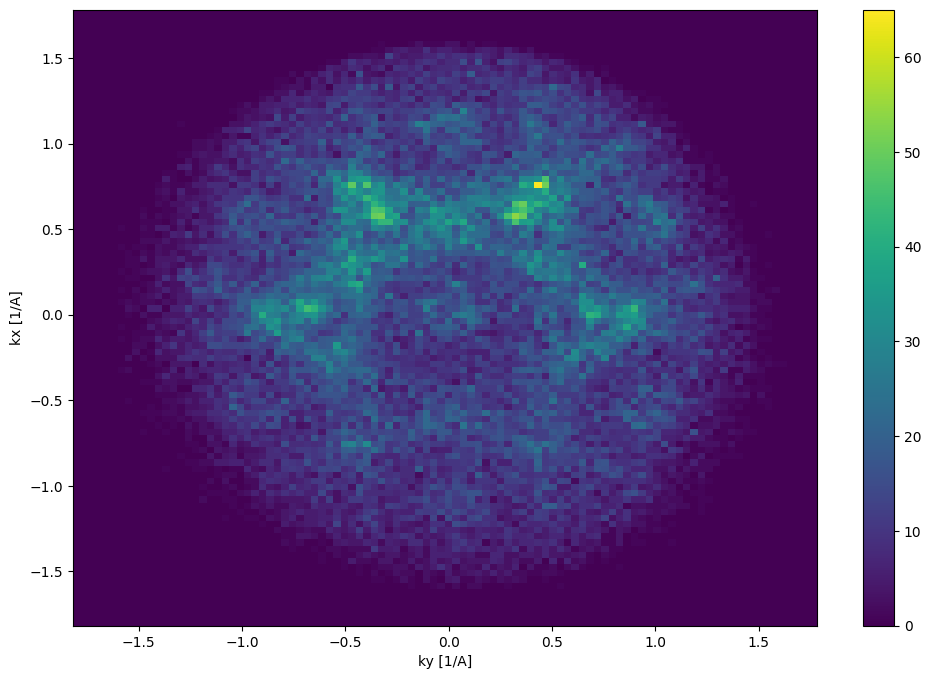

In [ ]:
import matplotlib.pyplot as plt
data=data_array
#the energy plot

en=data.loc[
    {
        'energy': slice(
            0.4333333333333331,
            0.4333333333333331
        ),
        'ADC': slice(
            590.0,
            590.0
        )
    }
].mean(dim=('energy', 'ADC'))
fig,ax=plt.subplots(1,1,figsize=(12,8),cmap='terrain')
en.plot(ax=ax)
plt.show()
            

In [ ]:
# Use the 3D Gui

import numpy as np
import xarray as xr
from mpes_tools.Gui_3d import Gui_3d
%gui qt

# import the 3D data
loaded_data= np.load('//nap33/wahada/Phoibospython/scan11443_filtered.npz')

V1= xr.DataArray(loaded_data['data_array'], dims=['Angle', 'Ekin','delay'], coords={'Angle': loaded_data['Angle'], 'Ekin': loaded_data['Ekin'],'delay': loaded_data['delay']})    
axis=[V1['Angle'],V1['Ekin']-21.7,V1['delay']]
# print(data.dims)
graph_window= Gui_3d(V1,0,0,'Phoibos')
graph_window.show()



('Angle', 'Ekin', 'delay')


<Figure size 640x480 with 0 Axes>

In [2]:
5

5

<Figure size 640x480 with 0 Axes>

In [2]:

data=V1
data = data.assign_coords(Ekin=data.coords['Ekin'] -21.7)
#the 2D plot data
data2D_plot=data.isel({data.dims[2]:slice(0, 1)}).sum(dim=data.dims[2])   

            

In [1]:
#Use the fit panel on the extracted data
from mpes_tools.fit_panel import fit_panel
graph_window=fit_panel(data,7.26502584586467,0, 0,0, data.dims[1])
graph_window.show()

NameError: name 'data' is not defined

In [11]:
5

5

In [9]:

import xarray as xr
import numpy as np

data_array = xr.DataArray(
    data=np.array([72454952.77813482, 74319394.28211385, 73902532.98867458, 71794649.12762325, 69014759.66859658, 64599615.499209926, 60882255.5172165, 58062323.58021691, 56750480.96430322, 56591974.51984634, 57053402.50227239, 58778077.13226885, 59581963.89421518, 62141887.68747307, 62140060.63846748, 63885922.12931153, 64763429.65702102, 65304896.7568378, 65599500.53851978, 67176412.11176091, 67299577.25888413, 67704501.05965017, 67746919.56904675, 67477095.46338437, 68109844.82892786, 68152383.42887904, 68101379.96762604, 68354705.80635957, 68622612.31118561, 68693658.6672469, 68949276.09725638, 68464478.46383135, 68297500.8992677, 68581073.5576817, 69156170.4879223, 68784956.93797548, 68601158.52842137, 68982572.6141164, 70068112.8320306, 69431684.97362354, 70064932.14450617, 69014533.06417881, 69112771.21447168, 69085856.65415049, 68686796.79644686, 69635436.53035763, 70133547.77226815, 70765222.3548185, 69798788.24872309, 70365060.35463753, 69805831.4598499, 70565982.03507684, 70761296.45137312, 70079495.2628483, 71242645.59718813, 71227586.09940824, 70449179.10912453, 69801265.3630908, 71011537.35769275, 70572296.99510731, 69851458.57252772, 70041990.79150626, 70929439.1441927, 70376205.0775435, 69823762.39368734, 70497642.1116163, 70653051.51037209, 70691808.57159007, 70598843.36181132, 70560704.38856414, 71101037.98545931, 70926537.33602336, 70388372.96071577, 70458144.73793708, 70415826.91751112, 71362907.81362744, 70449584.87394847, 70543133.37354767, 71670780.93813168, 70373590.28219332, 70527269.34599042, 69911586.02810569]),
    dims=('delay',),
    coords={'delay': [-799.4466666666729, -499.65333333337486, -199.86000000002943, -99.93333333336332, -74.94666666668573, -49.96666666670534, -24.980000000027754, 0.0, 24.979999999980386, 49.96666666665798, 74.94666666663836, 99.93333333331596, 124.91333333329634, 149.8933333333241, 174.88000000000167, 199.85999999998208, 224.84666666665967, 249.82666666664005, 274.8066666666678, 299.79333333329805, 324.77333333332575, 349.76000000000334, 374.73999999998375, 399.71999999996416, 424.70666666664175, 449.6866666666695, 474.6733333332997, 499.65333333332745, 524.6399999999577, 549.6199999999855, 574.5999999999658, 599.5866666666434, 624.5666666666239, 649.5533333333013, 674.5333333333291, 699.5133333333096, 724.4999999999872, 749.4799999999675, 774.4666666666451, 799.4466666666254, 899.3799999999889, 999.3066666666549, 1099.239999999971, 1199.166666666637, 1299.1000000000004, 1399.0333333333162, 1498.9599999999823, 1598.8933333332984, 1698.8266666666616, 1798.7533333333279, 1898.6866666666438, 1998.6133333333098, 2098.5466666666257, 2198.479999999989, 2298.4066666666554, 2398.339999999971, 2498.2733333333344, 2598.2000000000007, 2698.1333333333164, 2798.0599999999827, 2897.993333333299, 2997.926666666662, 3097.853333333328, 3197.786666666644, 3297.7199999999602, 3397.646666666626, 3497.5799999999895, 3597.5066666666557, 3697.4399999999714, 3797.373333333335, 3897.300000000001, 3997.2333333333168, 4097.166666666633, 4197.093333333299, 4297.026666666662, 4396.953333333328, 4496.8866666666445, 4596.819999999961, 4696.746666666627, 4796.679999999989, 4896.6133333333055, 4996.539999999972]},
    name="f0_A"
)


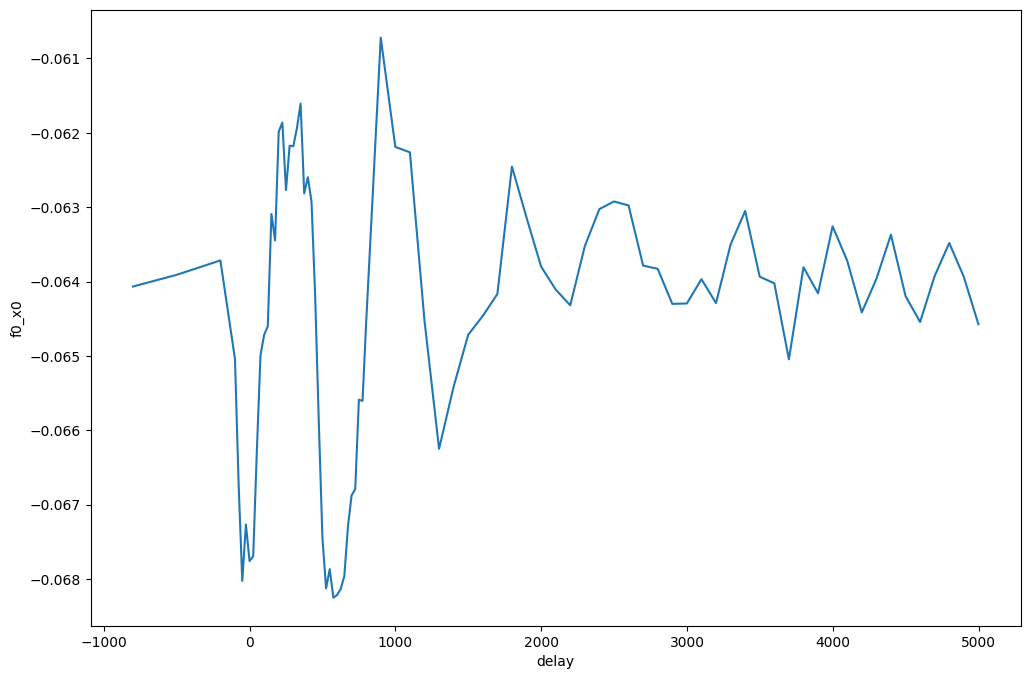

In [13]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(1,1,figsize=(12,8))
data_array.plot(ax=ax)